In [2]:
# What version of Python do you have?
import sys
import os
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import numpy as np
import re
import mne
import pathlib
import openpyxl
from datetime import datetime
import pytz
import random
import os
from skimage.restoration import (denoise_wavelet, estimate_sigma)
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, Sequential
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix, plot_confusion_matrix
from PIL import Image
%matplotlib inline

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.6.0
Keras Version: 2.6.0

Python 3.7.11 (default, Jul 27 2021, 09:42:29) [MSC v.1916 64 bit (AMD64)]
Pandas 1.3.3
Scikit-Learn 0.24.2
GPU is available


In [2]:
os.path.abspath(os.sep)

'c:\\'

In [3]:
# os.chdir("E:\Database")
# os.getcwd()

In [4]:
os.getcwd()

'c:\\Users\\thoma\\Desktop\\speciale\\DeepLearning_Master\\models\\VGG16'

In [5]:
# os.chdir("E:\Database")
# train_path = "E:/Database/Multi_Channel_Chb01/windows/train"
# batch_size = 10
# resnet152_input_shape = (224, 224)

# inceptionV3_input_shape = (299, 299)
# os.getcwd()

In [6]:
# import os
# path = '/Users/myName/Desktop/directory'

# count = 0
# for folder in os.listdir(train_path):
#     print(folder)
#     for file in os.listdir(train_path + "/" + folder):
#         print(file)
#         print(len(file))
#         if(len(file)> 25):
#             try:
#                 x = file[:-10] + ".png"
#                 os.rename(train_path + "/" + folder + "/" + file, train_path + "/" + folder + "/" + x)
#                 os.remove(train_path + "/" + folder + "/" + file)
#             except:
#                 pass
#         print(x)

In [3]:


train_path = "../../../windows_01_only_sz/win_chb_01"

test_path = "../../../psd_dual_channel_10_patient/windows/test"

resnet152_input_shape = (224, 224)

inceptionV3_input_shape = (299, 299)

batch_size = 20

In [4]:
for f in os.listdir(train_path):
    print(f)

Interictal
Preictal_One
Preictal_Two
Seizure


In [5]:
from tensorflow.keras.applications import VGG16, ResNet152

In [6]:
labels = [item for item in os.listdir(train_path)]
labels

['Interictal', 'Preictal_One', 'Preictal_Two', 'Seizure']

In [7]:
def inspect_class_distribution():
    dist_list = []
    for i in os.listdir(train_path):
        classname = i
        number_of_png = str(len([x for x in os.listdir(train_path + "/" + i)]))
        dict = {classname, number_of_png}
        dist_list.append(dict)
    return dist_list

inspect_class_distribution()

[{'27232', 'Interictal'},
 {'11856', 'Preictal_One'},
 {'7848', 'Preictal_Two'},
 {'1752', 'Seizure'}]

In [8]:
inceptionResnet = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape = (299, 299, 3)
)

for layer in inceptionResnet.layers:
    layer.trainable = False

inceptionResnet.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 299, 299, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 299, 299, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 149, 149, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 149, 149, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 149, 149, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 74, 74, 128)       0     

In [36]:
single_inc_model = Sequential()

single_inc_model.add(inceptionResnet)
single_inc_model.add(layers.Flatten())
single_inc_model.add(layers.Dense(1024, activation='relu'))
single_inc_model.add(layers.Dropout(0.6))
single_inc_model.add(layers.Dense(512, activation='relu'))
single_inc_model.add(layers.Dense(4, activation='softmax'))

In [14]:
single_inc_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 9, 9, 512)         14714688  
_________________________________________________________________
dense (Dense)                (None, 9, 9, 1024)        525312    
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 1024)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               42467840  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 2

In [9]:
from tensorflow.keras.layers import Layer
# build model
model2 = Sequential()
model2.add(layers.Conv2D(32, 3, padding='same', activation='relu',input_shape=(299,299,3))) 
model2.add(layers.MaxPool2D()) 
# model2.add(layers.Dropout(0.2))
# model2.add(layers.Conv2D(64, 5, padding='same', activation='relu'))
# model2.add(layers.MaxPool2D())
model2.add(layers.Dropout(0.4))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(4, activation='sigmoid'))

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 299, 299, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 149, 149, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 710432)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                45467712  
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 260       
Total params: 45,468,868
Trainable params: 45,468,868
Non-trainable params: 0
____________________________________________

In [16]:
from tensorflow.keras.applications.resnet import preprocess_input

In [10]:
generator = ImageDataGenerator(
  validation_split=0.2,
  rescale=1.255
)

In [11]:
inception_train_gen = generator.flow_from_directory(
    train_path,
    batch_size=batch_size, 
    target_size=inceptionV3_input_shape, 
    shuffle=True,
   # class_mode="binary",
    subset="training")

Found 38952 images belonging to 4 classes.


In [12]:
inception_validation_gen = generator.flow_from_directory(
    train_path,
    batch_size=batch_size, 
    target_size=inceptionV3_input_shape, 
    shuffle=True,
 #   class_mode="binary",
    subset="validation")

Found 9736 images belonging to 4 classes.


In [13]:
inception_train_gen.classes

array([0, 0, 0, ..., 3, 3, 3])

In [14]:
class_weights = {0: 0.4469741480611046,
                1: 1.0266531713900136,
                2: 1.5509683995922527,
                3: 6.947488584474886}

In [15]:
from tensorflow.keras.optimizers import Adam, SGD
opt = SGD(learning_rate=1e-5, momentum=0.9)

model2.compile(
    loss="categorical_crossentropy",
    optimizer=opt,
    metrics=['accuracy']
)

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(299,299,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))

In [20]:
from tensorflow.keras.optimizers import Adam, SGD
opt = Adam(0.001)

model.compile(
    loss="categorical_crossentropy",
    optimizer=opt,
    metrics=['accuracy']
)

In [23]:
import keras.backend as K
from keras.callbacks import Callback


class LRFinder(Callback):
    
    '''
    A simple callback for finding the optimal learning rate range for your model + dataset. 
    
    # Usage
        ```python
            lr_finder = LRFinder(min_lr=1e-5, 
                                 max_lr=1e-2, 
                                 steps_per_epoch=np.ceil(epoch_size/batch_size), 
                                 epochs=3)
            model.fit(X_train, Y_train, callbacks=[lr_finder])
            
            lr_finder.plot_loss()
        ```
    
    # Arguments
        min_lr: The lower bound of the learning rate range for the experiment.
        max_lr: The upper bound of the learning rate range for the experiment.
        steps_per_epoch: Number of mini-batches in the dataset. Calculated as `np.ceil(epoch_size/batch_size)`. 
        epochs: Number of epochs to run experiment. Usually between 2 and 4 epochs is sufficient. 
        
    # References
        Blog post: jeremyjordan.me/nn-learning-rate
        Original paper: https://arxiv.org/abs/1506.01186
    '''
    
    def __init__(self, min_lr=1e-5, max_lr=1e-2, steps_per_epoch=None, epochs=None):
        super().__init__()
        
        self.min_lr = min_lr
        self.max_lr = max_lr
        self.total_iterations = steps_per_epoch * epochs
        self.iteration = 0
        self.history = {}
        
    def clr(self):
        '''Calculate the learning rate.'''
        x = self.iteration / self.total_iterations 
        return self.min_lr + (self.max_lr-self.min_lr) * x
        
    def on_train_begin(self, logs=None):
        '''Initialize the learning rate to the minimum value at the start of training.'''
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.min_lr)
        
    def on_batch_end(self, epoch, logs=None):
        '''Record previous batch statistics and update the learning rate.'''
        logs = logs or {}
        self.iteration += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.iteration)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
            
        K.set_value(self.model.optimizer.lr, self.clr())
 
    def plot_lr(self):
        '''Helper function to quickly inspect the learning rate schedule.'''
        plt.plot(self.history['iterations'], self.history['lr'])
        plt.yscale('log')
        plt.xlabel('Iteration')
        plt.ylabel('Learning rate')
        plt.show()
        
    def plot_loss(self):
        '''Helper function to quickly observe the learning rate experiment results.'''
        plt.plot(self.history['lr'], self.history['loss'])
        plt.xscale('log')
        plt.xlabel('Learning rate')
        plt.ylabel('Loss')
        plt.show()


import numpy as np
from keras.callbacks import LearningRateScheduler

def step_decay_schedule(initial_lr=1e-3, decay_factor=0.75, step_size=10):
    '''
    Wrapper function to create a LearningRateScheduler with step decay schedule.
    '''
    def schedule(epoch):
        return initial_lr * (decay_factor ** np.floor(epoch/step_size))
    
    return LearningRateScheduler(schedule)

lr_sched = step_decay_schedule(initial_lr=1e-4, decay_factor=0.75, step_size=2)

In [16]:
lr_finder = LRFinder(min_lr=1e-5, 
                    max_lr=1e-2, 
                    steps_per_epoch=np.ceil(5/batch_size), 
                    epochs=3)
           

NameError: name 'LRFinder' is not defined

In [ ]:
def inspect_class_distribution():
    dist_list = []
    for i in os.listdir(train_path):
        classname = i
        number_of_png = str(len([x for x in os.listdir(train_path + "/" + i)]))
        dict = {classname, number_of_png}
        dist_list.append(dict)
    return dist_list

inspect_class_distribution()

[{'27232', 'Interictal'},
 {'11856', 'Preictal_One'},
 {'7848', 'Preictal_Two'},
 {'1752', 'Seizure'}]

In [22]:
history = model.fit(
    inception_train_gen,
    epochs=10,
    steps_per_epoch = inception_train_gen.samples//batch_size, 
    validation_data=inception_validation_gen, 
    validation_steps = inception_validation_gen.samples//batch_size,
    #callbacks=[lr_finder]
    class_weight=class_weights
    
)

Epoch 1/10
1947/1947 [==============================] - 131s 67ms/step - loss: 1.3868 - accuracy: 0.2208 - val_loss: 1.3830 - val_accuracy: 0.5594
Epoch 2/10
1947/1947 [==============================] - 131s 67ms/step - loss: 1.3869 - accuracy: 0.2831 - val_loss: 1.3872 - val_accuracy: 0.2435
Epoch 3/10
1947/1947 [==============================] - 131s 67ms/step - loss: 1.3867 - accuracy: 0.2078 - val_loss: 1.3845 - val_accuracy: 0.5592
Epoch 4/10
1947/1947 [==============================] - 135s 69ms/step - loss: 1.3864 - accuracy: 0.2240 - val_loss: 1.3839 - val_accuracy: 0.1611
Epoch 5/10
1947/1947 [==============================] - 131s 67ms/step - loss: 1.3864 - accuracy: 0.2857 - val_loss: 1.3914 - val_accuracy: 0.1612
Epoch 6/10
1947/1947 [==============================] - 134s 69ms/step - loss: 1.3861 - accuracy: 0.1248 - val_loss: 1.3754 - val_accuracy: 0.5595
Epoch 7/10
1947/1947 [==============================] - 132s 68ms/step - loss: 1.3867 - accuracy: 0.2181 - val_loss: 1

In [26]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path(train_path).rglob("*.png")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [27]:
#lr_finder.plot_loss()

In [32]:
#single_inc_model.save("vgg16_20epoc_NFFT.h5")

In [33]:
with open('history.txt', 'w') as f:
    f.write(str(history.history))

<Figure size 216x288 with 0 Axes>

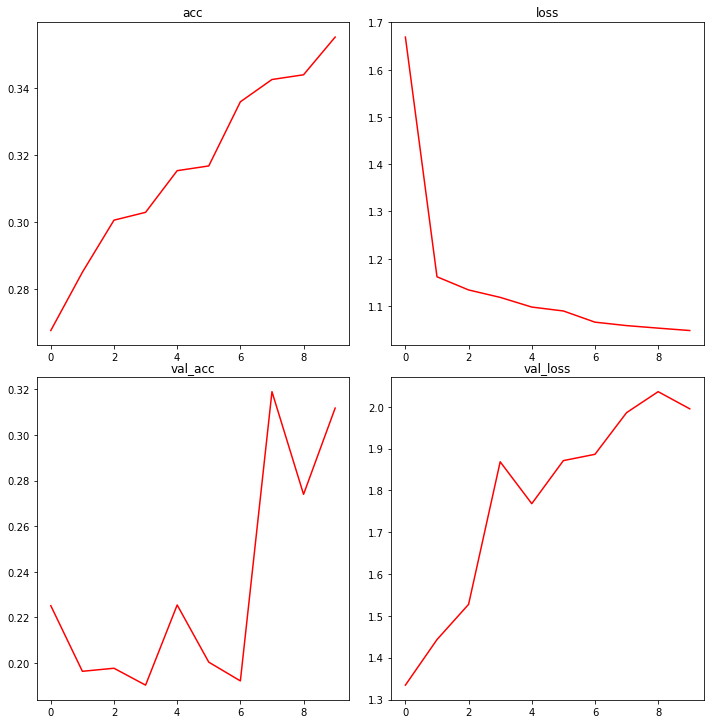

In [30]:
plt.figure(figsize=(3,4))
fig, axs = plt.subplots(2,2, figsize=(10,10))
plt.tight_layout()
axs[0,0].set_title('acc')
axs[0,0].plot(history.history['accuracy'], color='red')
axs[0,1].set_title('loss')
axs[0,1].plot(history.history['loss'], color='red')
axs[1,0].set_title('val_acc')
axs[1,0].plot(history.history['val_accuracy'], color='red')
axs[1,1].set_title('val_loss')
axs[1,1].plot(history.history['val_loss'], color='red')
plt.savefig("eval.png")